BT6220 | JULY-NOV 2022 | QUIZ I | 20 MARKS<br>
Consider the given dataset on the trajectory of Michaelis-Menten kinetics over (S, tau) space. 
Preliminary investigation suggests the probable range of epsilon, eta and kappa over (0, 1). Find out 
these values over xx.xx accuracy level (3 X 4 = 12). Upon obtaining these parameters, find out the steady 
state tau, S, P and X (4 X 2 = 8 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_53 = pd.read_csv("C:/Users/HP/Downloads/data.txt",sep=',',names = ["tau","s"])



In [2]:
df_53

,tau,s
0,0.0,1.000000
1,0.1,0.956943
2,0.2,0.934027
3,0.3,0.919689
4,0.4,0.909253
...,...,...
95,9.5,0.382155
96,9.6,0.377759
97,9.7,0.373396
98,9.8,0.369065


In [3]:
def michaelis_menten_kinetics(eta,kappa,eps,delt,tott):
    X0,P0,tau = 0,0,0
    trs = int(tott/delt)
    out = np.zeros((trs,6))

    Xtau,Ptau,Stau,Etau,Vtau = X0,P0,1.0,1.0,0
    i = 0
    
    while (i < trs):
        out[i,0:6] = [tau,Xtau,Ptau,Stau,Etau,Vtau]
        Xtau = Xtau + delt * ((1-Xtau)*(1-eps*Xtau-Ptau)-(eta+kappa)*Xtau)
        Ptau = Ptau + delt*eps*Xtau
        Etau = 1-Xtau
        Stau = 1-eps*Xtau-Ptau
        Vtau = eps*Xtau
        tau = tau + delt
        i = i+1
    
    #plt.plot(out[:,0],out[:,1:6])
    
    dxdt = np.diff(out[:,1])/np.diff(out[:,0])
    return (out,dxdt)

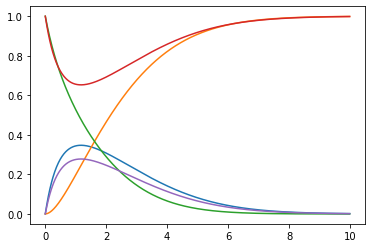

In [4]:
eta = 0.5 
kappa = 0.4 
eps = 0.8 
delt = 0.01
tott = 10
res,dxdt = michaelis_menten_kinetics(eta,kappa,eps,delt,tott)
plt.plot(res[:,0],res[:,1:6])

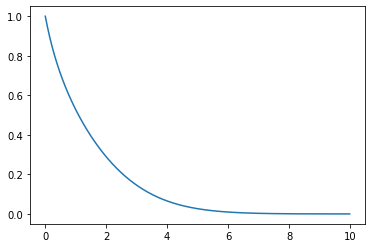

In [5]:
plt.plot(res[:,0],res[:,3])

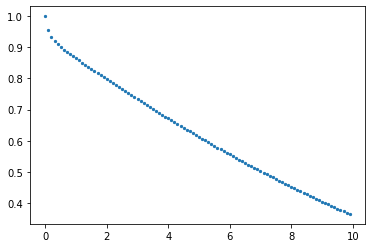

In [6]:
plt.scatter(df_53["tau"],df_53["s"],s=5)

In [7]:
error = 5
delt = 0.1
tott = 10

while (abs(error)>0.45):
    eta = np.random.uniform()
    kappa = np.random.uniform()
    eps = np.random.uniform()
    res,dxdt = michaelis_menten_kinetics(eta,kappa,eps,delt,tott)
    error = sum(np.absolute(res[:,3]-df_53["s"]))

    
    

In [8]:
eta,kappa,eps,error

(0.9138529927973043, 0.514579906561321, 0.19906022808485635, 0.428367482052122)

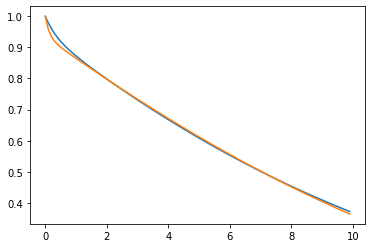

In [9]:
plt.plot(res[:,0],res[:,3])
plt.plot(df_53["tau"],df_53["s"])

In [10]:
eta1,kappa1,eps1,error1 = np.round([eta,kappa,eps,error],2)
eta1,kappa1,eps1,error1

(0.91, 0.51, 0.2, 0.43)

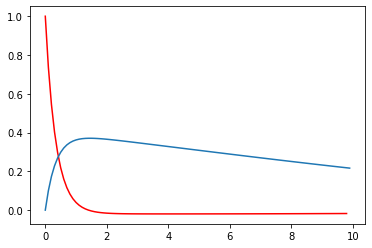

In [11]:
plt.plot(res[:-1,0],dxdt,c="r")
plt.plot(res[:,0],res[:,1])

In [12]:
pt = 0
for i in dxdt:
    if(i<0):
        pt = np.where(dxdt==i)
        break

In [13]:
pt[0][0]

15

state tau, S, P and X 

In [14]:
stau, sS, sP, sX = res[pt[0][0]-1,0],res[pt[0][0]-1,3],res[pt[0][0]-1,2],res[pt[0][0]-1,1]

np.round([stau, sS, sP, sX],2)

array([1.4 , 0.84, 0.08, 0.37])

In [15]:
stau, sS, sP, sX

(1.4000000000000001,
 0.8413113364019684,
 0.08492300140990344,
 0.3705695652909778)